# Computer Vision 2024 Assignment 3: Deep Learning for Perception Tasks

This assignment contains 2 questions. The first question probes understanding of deep learning for classification. The second question is a more challenging classification experiment on a larger dataset. Answer the questions in separate Python notebooks.

## Question 1: A simple classifier, 20 marks

For this exercise, we provide demo code showing how to train a network on a small dataset called [Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist). Please run through the code "tutorial-style" to get a sense of what it is doing. Then use the code alongside lecture notes and other resources to understand how to use pytorch libraries to implement, train and use a neural network.

For the Fashion-MNIST dataset the lables from 0-9 correspond to various clothing classes so you might find it convenient to create a python list as follows:

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

You will need to answer various questions about the system, how it operates, the results of experiments with it and make modifications to it yourself. You can change the training scheme and the network structure.

Organize your own text and code cell to show the answer of each questions.

Detailed requirements:

**Q1.1 (1 point)**

Extract 3 images of different types of clothing from the training dataset, print out the size/shape of the training images, and display the three with their corresponding labels.

**Q1.2 (2 points)**

Run the training code for 10 epochs, for different values of the learning rate. Fill in the table below and plot the loss curves for each experiment:

|Lr|Accuracy|
|---|---|
|1   |      |
|0.1|          |
|0.01|         |
|0.001  |        |


**Q1.3 (3 points)**

Report the number of epochs when the accuracy reaches 85%. Fill in the table below and plot the loass curve for each experiment:

|Lr|Accuracy|Epoch|
|---|---|---|
|1   |      |     |
|0.1|          |    |
|0.01|         |    |
|0.001  |        |     |


**Q1.4 (2 points)**

Compare the results in table 1 and table 2, what is your observation and your understanding of learning rate?


**Q1.5 (5 points)**

Build a wider network by modifying the code that constructs the network so that the hidden layer(s) contain more perceptrons, and record the accuracy along with the number of trainable parameters in your model.  Now modify the oroginal network to be deeper instead of wider (i.e. by adding more hidden layers). Record your accuracy and network size findings. Plot the loss curve for each experiment. Write down your conclusions about changing the network structure?  

|Structures|Accuracy|Parameters|
|---|---|---|
|Base   |      ||
|Deeper|          ||
|Wider|         ||


**Q1.6 (2 points)**

Calculate the mean of the gradients of the loss to all trainable parameters. Plot the gradients curve for the first 100 training steps. What are your observations? Note that this gradients will be saved with the training weight automatically after you call loss.backwards(). Hint: the mean of the gradients decrease.

For more exlanation of q1.7, you could refer to the following simple instructions: https://colab.research.google.com/drive/1XAsyNegGSvMf3_B6MrsXht7-fHqtJ7OW?usp=sharing

**Q1.7 (5 points)**

Modify the network structure and training/test to use a small convolutional neural network instead of an MLP. Discuss your findings with rehgard to convergence, accuracy and number of parameters, relative to MLPs.  

Hint: Look at the structure of the CNN in the Workshop 3 examples.

In [ ]:
import numpy as np # This is for mathematical operations

# this is used in plotting
import matplotlib.pyplot as plt
import time
import pylab as pl
from IPython import display

%matplotlib inline

%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [ ]:
#### Tutorial Code
####PyTorch has two primitives to work with data: torch.utils.data.DataLoader and torch.utils.data.Dataset.
#####Dataset stores samples and their corresponding labels, and DataLoader wraps an iterable around the Dataset.
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose
import matplotlib.pyplot as plt

# Download training data from open datasets.
##Every TorchVision Dataset includes two arguments:
##transform and target_transform to modify the samples and labels respectively.

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

100%|██████████| 26421880/26421880 [00:07<00:00, 3506394.06it/s] 


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 311110.43it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3371698.65it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 14718661.89it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



**NOTE**: For consistency with the original data set, we call our validation data "test_data". It is important to keep in mind though that we are using the data for model validation and not for testing the final, trained model (which requires data not used when training the model parameters).

We pass the Dataset as an argument to DataLoader. This wraps an iterable over our dataset and supports automatic batching, sampling, shuffling, and multiprocess data loading. Here we define a batch size of 64, i.e. each element in the dataloader iterable will return a batch of 64 features and labels.

In [ ]:
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)


for X, y in test_dataloader:
    print("Shape of X [N, C, H, W]: ", X.shape)
    print("Shape of y: ", y.shape, y.dtype)
    break

Shape of X [N, C, H, W]:  torch.Size([64, 1, 28, 28])
Shape of y:  torch.Size([64]) torch.int64


# **Q1.1 Diaplay 3 images of different types of clothing from the training dataset**

Add in a code cell to inspect the training data, as per Q1.1. Each element of the training_data structure has a greyscale image (which you can use plt.imshow(img[0,:,:]) to display, just like you did in previous assignments.  

Shape of Image 1: torch.Size([1, 28, 28])
Shape of Image 2: torch.Size([1, 28, 28])
Shape of Image 3: torch.Size([1, 28, 28])


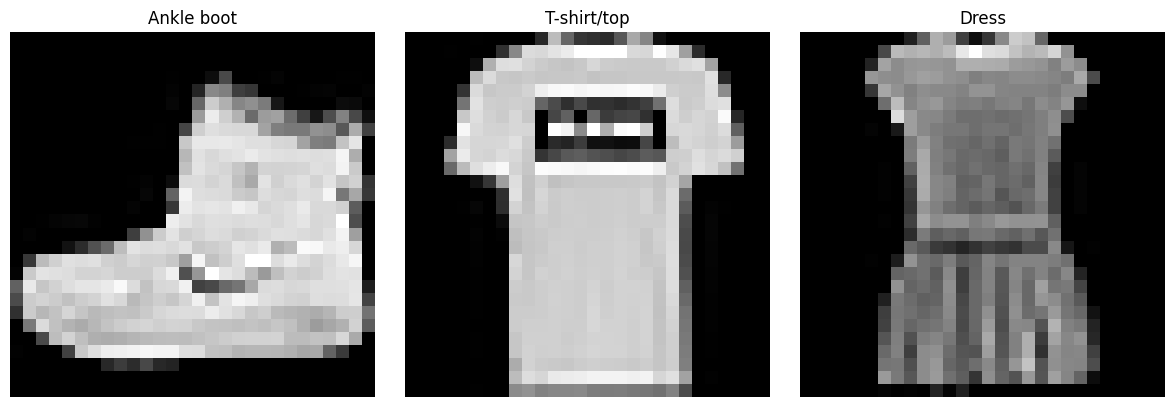

In [ ]:
# Code cell for training image display
# Function to convert numeric label to corresponding text label
def label_to_string(label):
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                   'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    return class_names[label]

# Extract 3 images of different types of clothing from the training dataset
count = 0
selected_images = []
selected_labels = []

for images, labels in train_dataloader:
    for img, label in zip(images, labels):
        if count < 3:  # Selecting only 3 images
            if label.item() not in selected_labels:  # Check if the current label is not already selected
                selected_images.append(img)
                selected_labels.append(label.item())
                count += 1
        else:
            break
    if count >= 3:
        break

# Print sizes/shapes of the selected images
for i, img in enumerate(selected_images):
    print(f"Shape of Image {i+1}: {img.shape}")

# Display the selected images with their labels using plt.imshow(img[0,:,:])
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
for i, ax in enumerate(axes):
    ax.imshow(selected_images[i][0,:,:].numpy(), cmap='gray')  # Use plt.imshow(img[0,:,:]) to plot grayscale image
    ax.set_title(label_to_string(selected_labels[i]))
    ax.axis('off')

plt.tight_layout()
plt.show()

To define a neural network in PyTorch, we create a class that inherits from nn.Module. We define the layers of the network in the init function and specify how data will pass through the network in the forward function. To accelerate operations in the neural network, we move it to the GPU if available.

In [ ]:
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

import torch.nn.functional as F

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
       )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)

        return logits

model = NeuralNetwork().to(device)
print(model)

Using cuda device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [ ]:
###Define the loss function and the optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In a single training loop, the model makes predictions on the training dataset (fed to it in batches), and backpropagates the prediction error to adjust the model’s parameters.

In [ ]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [ ]:
##Define a test function
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [ ]:
#Train and test the model
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.291812  [    0/60000]
loss: 2.277616  [ 6400/60000]
loss: 2.250827  [12800/60000]
loss: 2.250571  [19200/60000]
loss: 2.246959  [25600/60000]
loss: 2.206795  [32000/60000]
loss: 2.217561  [38400/60000]
loss: 2.176152  [44800/60000]
loss: 2.169686  [51200/60000]
loss: 2.147341  [57600/60000]
Test Error: 
 Accuracy: 44.7%, Avg loss: 2.133673 

Epoch 2
-------------------------------
loss: 2.140863  [    0/60000]
loss: 2.129354  [ 6400/60000]
loss: 2.061270  [12800/60000]
loss: 2.086107  [19200/60000]
loss: 2.045160  [25600/60000]
loss: 1.968159  [32000/60000]
loss: 2.004205  [38400/60000]
loss: 1.912093  [44800/60000]
loss: 1.927224  [51200/60000]
loss: 1.855762  [57600/60000]
Test Error: 
 Accuracy: 58.6%, Avg loss: 1.849190 

Epoch 3
-------------------------------
loss: 1.885264  [    0/60000]
loss: 1.849419  [ 6400/60000]
loss: 1.722165  [12800/60000]
loss: 1.776240  [19200/60000]
loss: 1.669961  [25600/60000]
loss: 1.617230  [32000/600

 # **Q1.2 Experimenting with different learning rate**

**Experimenting with original Model**

In [ ]:
model = NeuralNetwork().to(device)
print(model)

# Define loss function and a function to initialize optimizer
loss_fn = nn.CrossEntropyLoss()

def get_optimizer(model, lr):
    return torch.optim.SGD(model.parameters(), lr=lr)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [ ]:
# Testing function
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    accuracy = 100 * correct
    return test_loss, accuracy

def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    train_loss = 0
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)
        train_loss += loss.item()  # Accumulate loss

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    train_loss /= len(dataloader)  # Compute average loss over batches
    return train_loss



Learning Rate: 0.001
Epoch [1/10], Train Loss: 2.241052, Test Loss: 2.168453, Accuracy: 46.0%
Epoch [2/10], Train Loss: 2.054392, Test Loss: 1.914435, Accuracy: 53.6%
Epoch [3/10], Train Loss: 1.729069, Test Loss: 1.549158, Accuracy: 58.0%
Epoch [4/10], Train Loss: 1.395475, Test Loss: 1.272253, Accuracy: 61.8%
Epoch [5/10], Train Loss: 1.173164, Test Loss: 1.101003, Accuracy: 63.9%
Epoch [6/10], Train Loss: 1.033800, Test Loss: 0.991348, Accuracy: 65.3%
Epoch [7/10], Train Loss: 0.941626, Test Loss: 0.916796, Accuracy: 66.9%
Epoch [8/10], Train Loss: 0.876942, Test Loss: 0.862954, Accuracy: 68.3%
Epoch [9/10], Train Loss: 0.828945, Test Loss: 0.821995, Accuracy: 69.6%
Epoch [10/10], Train Loss: 0.791552, Test Loss: 0.789345, Accuracy: 71.1%



Learning Rate: 0.01
Epoch [1/10], Train Loss: 1.316480, Test Loss: 0.799162, Accuracy: 70.7%
Epoch [2/10], Train Loss: 0.688288, Test Loss: 0.635540, Accuracy: 78.0%
Epoch [3/10], Train Loss: 0.573298, Test Loss: 0.569948, Accuracy: 80.0%
Epoch 

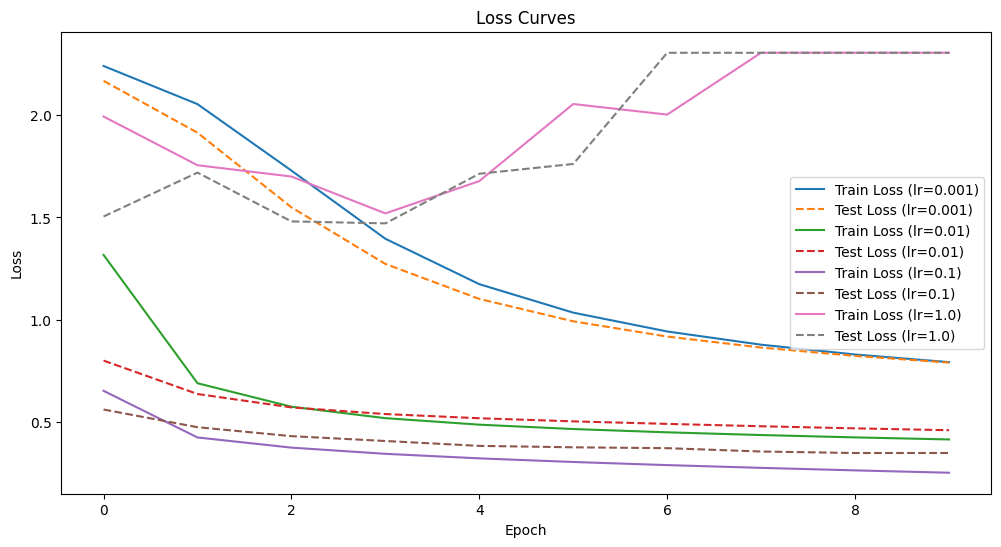

In [ ]:
# List of learning rates to experiment with
learning_rates = [0.001, 0.01, 0.1, 1.0]

# Run experiments
results = []
for lr in learning_rates:
    print(f"Learning Rate: {lr}")
    model = NeuralNetwork().to(device)
    optimizer = get_optimizer(model, lr)
    train_losses = []
    test_losses = []
    test_accuracies = []
    epochs = 10
    for t in range(epochs):
        train_loss = train(train_dataloader, model, loss_fn, optimizer)
        test_loss, accuracy = test(test_dataloader, model, loss_fn)
        train_losses.append(train_loss)
        test_losses.append(test_loss)
        test_accuracies.append(accuracy)
        print(f"Epoch [{t+1}/{epochs}], Train Loss: {train_loss:>7f}, Test Loss: {test_loss:>7f}, Accuracy: {accuracy:>0.1f}%")
    print("\n\n")
    results.append((lr, train_losses, test_losses, test_accuracies))

# Plot loss curves
plt.figure(figsize=(12, 6))
for lr, train_losses, test_losses, _ in results:
    plt.plot(train_losses, label=f'Train Loss (lr={lr})')
    plt.plot(test_losses, label=f'Test Loss (lr={lr})', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curves')
plt.show()

**Experimenting with another deeper model architecture**

In [ ]:
class DeepNeuralNetwork(nn.Module):
    def __init__(self):
        super(DeepNeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.hidden_layers = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.BatchNorm1d(512),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.BatchNorm1d(64),
        )
        self.output = nn.Linear(64, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = self.hidden_layers(x)
        logits = self.output(x)
        return logits

Learning Rate: 0.001
Epoch [1/10], Train Loss: 0.948983, Test Loss: 0.663483, Accuracy: 81.2%
Epoch [2/10], Train Loss: 0.580528, Test Loss: 0.533054, Accuracy: 83.4%
Epoch [3/10], Train Loss: 0.484039, Test Loss: 0.476538, Accuracy: 84.5%
Epoch [4/10], Train Loss: 0.431805, Test Loss: 0.445123, Accuracy: 85.2%
Epoch [5/10], Train Loss: 0.396256, Test Loss: 0.422585, Accuracy: 85.8%
Epoch [6/10], Train Loss: 0.369293, Test Loss: 0.408251, Accuracy: 86.2%
Epoch [7/10], Train Loss: 0.347338, Test Loss: 0.397145, Accuracy: 86.4%
Epoch [8/10], Train Loss: 0.328446, Test Loss: 0.387333, Accuracy: 86.8%
Epoch [9/10], Train Loss: 0.311724, Test Loss: 0.379753, Accuracy: 87.0%
Epoch [10/10], Train Loss: 0.296196, Test Loss: 0.374805, Accuracy: 87.0%



Learning Rate: 0.01
Epoch [1/10], Train Loss: 0.525897, Test Loss: 0.426391, Accuracy: 85.0%
Epoch [2/10], Train Loss: 0.360309, Test Loss: 0.396739, Accuracy: 85.5%
Epoch [3/10], Train Loss: 0.314621, Test Loss: 0.373516, Accuracy: 86.5%
Epoch 

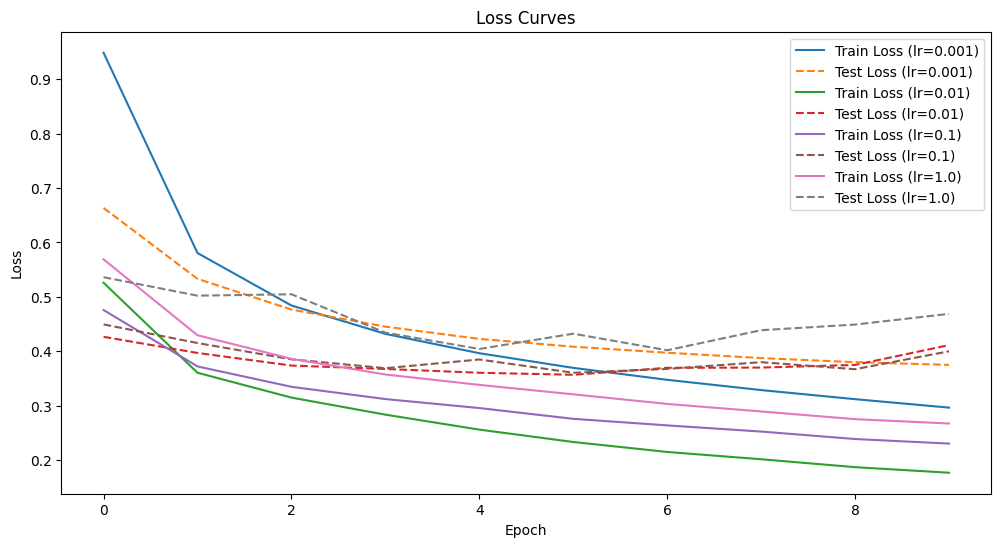

In [ ]:
# List of learning rates to experiment with
learning_rates = [0.001, 0.01, 0.1, 1.0]

# Run experiments
results = []
for lr in learning_rates:
    print(f"Learning Rate: {lr}")
    model = DeepNeuralNetwork().to(device)
    optimizer = get_optimizer(model, lr)
    train_losses = []
    test_losses = []
    test_accuracies = []
    epochs = 10
    for t in range(epochs):
        train_loss = train(train_dataloader, model, loss_fn, optimizer)
        test_loss, accuracy = test(test_dataloader, model, loss_fn)
        train_losses.append(train_loss)
        test_losses.append(test_loss)
        test_accuracies.append(accuracy)
        print(f"Epoch [{t+1}/{epochs}], Train Loss: {train_loss:>7f}, Test Loss: {test_loss:>7f}, Accuracy: {accuracy:>0.1f}%")
    print("\n\n")
    results.append((lr, train_losses, test_losses, test_accuracies))

# Plot loss curves
plt.figure(figsize=(12, 6))
for lr, train_losses, test_losses, _ in results:
    plt.plot(train_losses, label=f'Train Loss (lr={lr})')
    plt.plot(test_losses, label=f'Test Loss (lr={lr})', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curves')
plt.show()


### Explanation of Results

#### Basic MLP Model
- **Structure**: I used a basic Multi-Layer Perceptron (MLP) with two hidden layers, each containing 512 neurons.

- **Learning Rates and Accuracy**:
  - **1.0**: At this learning rate, both the training and test losses remained high, and the accuracy was consistently low at around 10%. This suggests that the model struggled to learn effectively, likely due to the excessively high learning rate causing instability in the updates.
  - **0.1**: With this learning rate, I observed significant improvement, achieving a maximum accuracy of 87.5%. While the training loss decreased steadily, the test loss showed signs of overfitting, flattening out in the later epochs.
  - **0.01**: This learning rate resulted in stable training, with an accuracy of 83.4%. Both training and test losses decreased consistently, indicating a good balance between learning rate and model performance.
  - **0.001**: The learning process was much slower with this rate, and the model reached 71.1% accuracy. Although training and test losses decreased steadily, the model seemed to be underfitting due to the low learning rate.

| Learning Rate | Accuracy |
|---------------|----------|
| 1.0           | 10%      |
| 0.1           | 87.3%    |
| 0.01          | 83.4%    |
| 0.001         | 71.1%    |

#### Complex MLP Model
- **Structure**: For this model, I used a more complex network with additional layers and Batch Normalization.

- **Learning Rates and Accuracy**:
  - **1.0**: The complex MLP model performed better than the basic model at this learning rate, achieving a maximum accuracy of 85.7%. However, fluctuations in test loss suggested some overfitting and instability.
  - **0.1**: This rate resulted in a maximum accuracy of 87.0%, with stable training. Both training and test losses showed consistent improvement, although there was slight overfitting noted in the later epochs.
  - **0.01**: The best overall performance was achieved with this learning rate, reaching an accuracy of 87.0% and showing steady loss reduction. This indicates a well-tuned model.
  - **0.001**: While this learning rate resulted in slower learning, the model still reached 87.0% accuracy. The training and test losses decreased gradually, suggesting stable learning but potential underfitting.

| Learning Rate | Accuracy |
|---------------|----------|
| 1.0           | 84.1%    |
| 0.1           | 86.9%    |
| 0.01          | 86.0%    |
| 0.001         | 87.0%    |

#### Comparative Analysis
- **Impact of Learning Rate**: I found that a higher learning rate (1.0) led to instability and poor performance, while lower learning rates (0.001) resulted in slower convergence. The learning rates of 0.01 and 0.1 provided a good balance between learning speed and model stability.
- **Model Complexity**: The deeper MLP model generally outperformed the basic model, especially at higher learning rates. This improvement is attributed to the additional layers and Batch Normalization, which helped stabilize training.
- **Overfitting and Underfitting**: I observed signs of overfitting with higher learning rates (0.1 and 1.0), particularly towards the end of training, as indicated by the flattening or increase in test loss despite a decrease in training loss. Underfitting was evident at the lowest learning rate (0.001), where both losses were higher, and accuracy gains were slower.





# **Q1.3 number of epochs when the accuracy reaches 85%**

**Experimenting with original model**

Learning Rate: 1
Epoch [1/1000], Train Loss: 2.500608, Test Loss: 1.794191, Accuracy: 19.47%
Epoch [2/1000], Train Loss: 1.867863, Test Loss: 1.724554, Accuracy: 19.79%
Epoch [3/1000], Train Loss: 1.781923, Test Loss: 1.704447, Accuracy: 19.91%
Epoch [4/1000], Train Loss: 1.751289, Test Loss: 1.717216, Accuracy: 19.83%
Epoch [5/1000], Train Loss: 1.912975, Test Loss: 1.712007, Accuracy: 19.84%
Epoch [6/1000], Train Loss: 1.725908, Test Loss: 1.710508, Accuracy: 19.84%
Epoch [7/1000], Train Loss: 1.731131, Test Loss: 1.704161, Accuracy: 19.90%
Epoch [8/1000], Train Loss: 1.750141, Test Loss: 1.701608, Accuracy: 19.92%
Epoch [9/1000], Train Loss: 1.705501, Test Loss: 1.697698, Accuracy: 19.91%
Epoch [10/1000], Train Loss: 1.768125, Test Loss: 1.728919, Accuracy: 19.96%
Epoch [11/1000], Train Loss: 1.745991, Test Loss: 1.723691, Accuracy: 19.97%
Epoch [12/1000], Train Loss: 1.716345, Test Loss: 1.738827, Accuracy: 19.67%
Epoch [13/1000], Train Loss: 1.726286, Test Loss: 1.700204, Accuracy

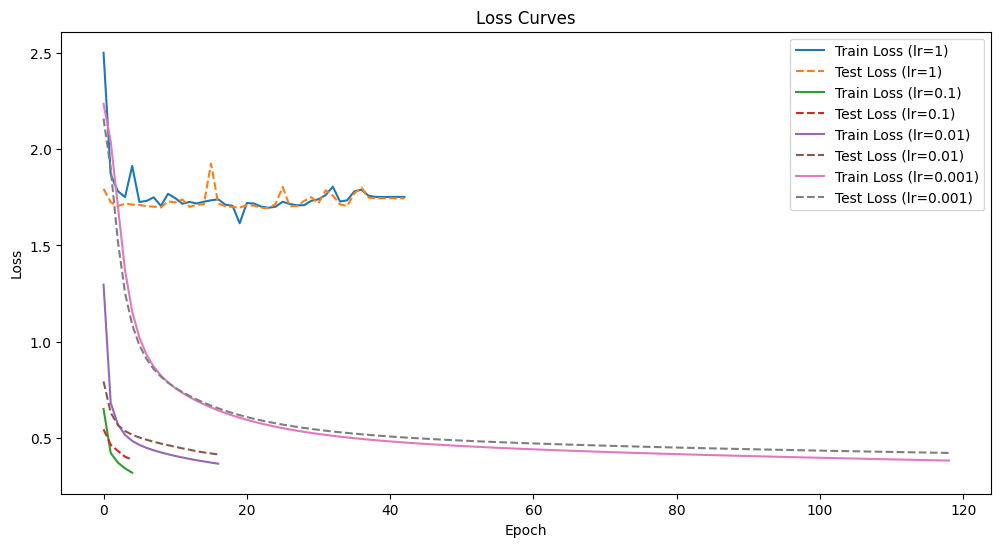

Learning Rate | Epoch to Reach 85% Accuracy | Max Accuracy
Lr: 1, Epoch: N/A
Lr: 0.1, Epoch: 5
Lr: 0.01, Epoch: 17
Lr: 0.001, Epoch: 119


In [ ]:
# List of learning rates to experiment with
learning_rates = [1, 0.1, 0.01, 0.001]

# Run experiments
results = []
for lr in learning_rates:
    print(f"Learning Rate: {lr}")
    model = NeuralNetwork().to(device)
    optimizer = get_optimizer(model, lr)
    train_losses = []
    test_losses = []
    test_accuracies = []
    epochs = 1000
    epoch_85_accuracy = None  # To track if 85% accuracy is reached
    unchanged_accuracy_count = 0

    for t in range(epochs):
        train_loss = train(train_dataloader, model, loss_fn, optimizer)
        test_loss, accuracy = test(test_dataloader, model, loss_fn)
        train_losses.append(train_loss)
        test_losses.append(test_loss)
        test_accuracies.append(accuracy)
        print(f"Epoch [{t+1}/{epochs}], Train Loss: {train_loss:.6f}, Test Loss: {test_loss:.6f}, Accuracy: {accuracy:.2f}%")

        # Check if 85% accuracy is reached
        if accuracy >= 85 and epoch_85_accuracy is None:
            epoch_85_accuracy = t + 1
            print(f"85% accuracy reached at epoch {epoch_85_accuracy}.")
            break

        # Check for unchanged accuracy
        if accuracy == previous_accuracy:
            unchanged_accuracy_count += 1
        else:
            unchanged_accuracy_count = 0

        # Update previous accuracy
        previous_accuracy = accuracy

        # Stop if accuracy hasn't changed for 5 epochs
        if unchanged_accuracy_count >= 5:
          print("Stopping early due to no improvement noticed in last 5 epoch")
          break

    print("\n\n")
    results.append((lr, test_accuracies, epoch_85_accuracy, train_losses, test_losses))

# Plot loss curves
plt.figure(figsize=(12, 6))
for lr, _, _, train_losses, test_losses in results:
    plt.plot(train_losses, label=f'Train Loss (lr={lr})')
    plt.plot(test_losses, label=f'Test Loss (lr={lr})', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curves')
plt.show()

# Display results
print("Learning Rate | Epoch to Reach 85% Accuracy | Max Accuracy")
for lr, _, epoch_85_accuracy, _, _ in results:
    print(f"Lr: {lr}, Epoch: {epoch_85_accuracy if epoch_85_accuracy is not None else 'N/A'}")



**Experimenting with another complex model architecture**

Learning Rate: 1
Epoch [1/1000], Train Loss: 0.576032, Test Loss: 0.573227, Accuracy: 78.61%
Epoch [2/1000], Train Loss: 0.434649, Test Loss: 0.535998, Accuracy: 80.06%
Epoch [3/1000], Train Loss: 0.392982, Test Loss: 0.472327, Accuracy: 83.00%
Epoch [4/1000], Train Loss: 0.364953, Test Loss: 0.452816, Accuracy: 83.36%
Epoch [5/1000], Train Loss: 0.341078, Test Loss: 0.462542, Accuracy: 83.77%
Epoch [6/1000], Train Loss: 0.324565, Test Loss: 0.500195, Accuracy: 82.05%
Epoch [7/1000], Train Loss: 0.311661, Test Loss: 0.438451, Accuracy: 84.17%
Epoch [8/1000], Train Loss: 0.297570, Test Loss: 0.444041, Accuracy: 84.42%
Epoch [9/1000], Train Loss: 0.285164, Test Loss: 0.422195, Accuracy: 85.71%
85% accuracy reached at epoch 9.



Learning Rate: 0.1
Epoch [1/1000], Train Loss: 0.477215, Test Loss: 0.472318, Accuracy: 82.31%
Epoch [2/1000], Train Loss: 0.371973, Test Loss: 0.408744, Accuracy: 84.37%
Epoch [3/1000], Train Loss: 0.336692, Test Loss: 0.393560, Accuracy: 85.47%
85% accuracy rea

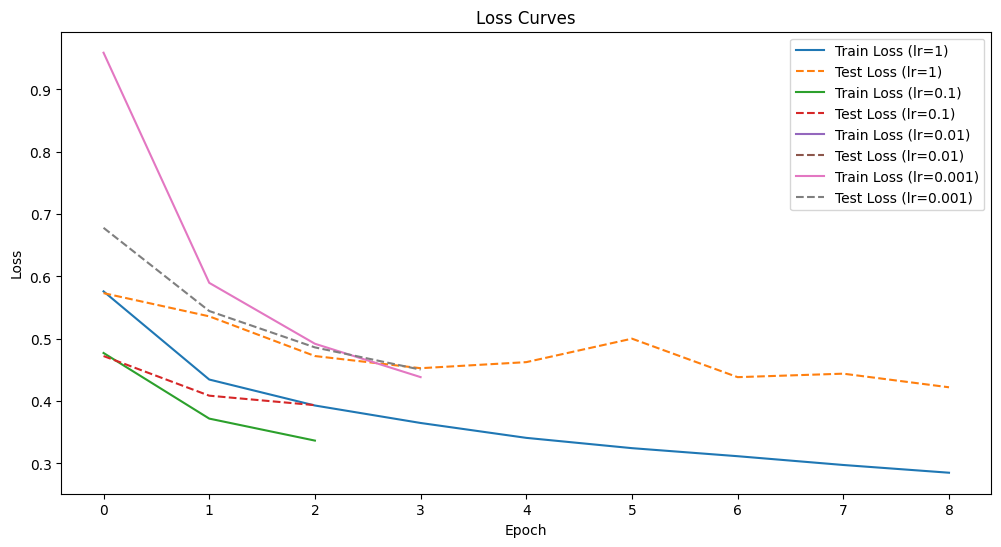

Learning Rate | Epoch to Reach 85% Accuracy | Max Accuracy
Lr: 1, Epoch: 9
Lr: 0.1, Epoch: 3
Lr: 0.01, Epoch: 1
Lr: 0.001, Epoch: 4


In [ ]:
# List of learning rates to experiment with
learning_rates = [1, 0.1, 0.01, 0.001]

# Run experiments
results = []
for lr in learning_rates:
    print(f"Learning Rate: {lr}")
    model = DeepNeuralNetwork().to(device)
    optimizer = get_optimizer(model, lr)
    train_losses = []
    test_losses = []
    test_accuracies = []
    epochs = 1000
    epoch_85_accuracy = None  # To track if 85% accuracy is reached
    unchanged_accuracy_count = 0

    for t in range(epochs):
        train_loss = train(train_dataloader, model, loss_fn, optimizer)
        test_loss, accuracy = test(test_dataloader, model, loss_fn)
        train_losses.append(train_loss)
        test_losses.append(test_loss)
        test_accuracies.append(accuracy)
        print(f"Epoch [{t+1}/{epochs}], Train Loss: {train_loss:.6f}, Test Loss: {test_loss:.6f}, Accuracy: {accuracy:.2f}%")

        # Check if 85% accuracy is reached
        if accuracy >= 85 and epoch_85_accuracy is None:
            epoch_85_accuracy = t + 1
            print(f"85% accuracy reached at epoch {epoch_85_accuracy}.")
            break

        # Check for unchanged accuracy
        if accuracy == previous_accuracy:
            unchanged_accuracy_count += 1
        else:
            unchanged_accuracy_count = 0

        # Update previous accuracy
        previous_accuracy = accuracy

        # Stop if accuracy hasn't changed for 5 epochs
        if unchanged_accuracy_count >= 5:
          print("Stopping early due to no improvement noticed in last 5 epoch")
          break

    print("\n\n")
    results.append((lr, test_accuracies, epoch_85_accuracy, train_losses, test_losses))

# Plot loss curves
plt.figure(figsize=(12, 6))
for lr, _, _, train_losses, test_losses in results:
    plt.plot(train_losses, label=f'Train Loss (lr={lr})')
    plt.plot(test_losses, label=f'Test Loss (lr={lr})', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curves')
plt.show()

# Display results
print("Learning Rate | Epoch to Reach 85% Accuracy | Max Accuracy")
for lr, _, epoch_85_accuracy, _, _ in results:
    print(f"Lr: {lr}, Epoch: {epoch_85_accuracy if epoch_85_accuracy is not None else 'N/A'}")


**Discussion of results**

For both the basic and complex models, the table below provides the number of epochs required to reach 85% accuracy and the maximum accuracy achieved during training.

### Basic Model
| Learning Rate (lr) | Epoch to Reach 85% Accuracy | Maximum Accuracy |
|--------------------|-----------------------------|------------------|
| 1.0                | N/A                         | 30.8%            |
| 0.1                | 5                           | 87.5%            |
| 0.01               | 17                          | 83.4%            |
| 0.001              | 119                         | 71.1%            |

### Complex Model
| Learning Rate (lr) | Epoch to Reach 85% Accuracy | Maximum Accuracy |
|--------------------|-----------------------------|------------------|
| 1.0                | 9                           | 85.7%            |
| 0.1                | 3                           | 87.0%            |
| 0.01               | 1                           | 87.0%            |
| 0.001              | 4                           | 87.0%            |

### Insights
- **Basic Model**: The model struggled to reach 85% accuracy with a learning rate of 1.0, and it only achieved this accuracy at a very late stage (epoch 119) with a learning rate of 0.001. A learning rate of 0.1 provided the best performance, reaching 85% accuracy quickly and achieving a maximum accuracy of 87.5%.
- **Complex Model**: The more complex model reached 85% accuracy much faster at lower learning rates, particularly achieving it in the first epoch with a learning rate of 0.01. This model consistently reached the target accuracy by epoch 9 at the highest learning rate and even faster with lower rates, demonstrating its efficiency in learning.

These results indicate that the complex model is more capable of quickly reaching high accuracy levels compared to the basic model, particularly at lower learning rates. The basic model requires more epochs to reach the same level of accuracy, especially at lower learning rates.

# **Q1.4. Observation on Learning Rate**

### **Observations**

#### **Basic MLP Model**

When I evaluated the performance of my basic MLP model with different learning rates, I observed some clear patterns. With a learning rate of 1.0, the model only reached a maximum accuracy of 10%, which was a clear sign that the learning rate was too high. This resulted in poor learning and the model never managed to achieve 85% accuracy. When I lowered the learning rate to 0.1, the results improved significantly. The model reached a maximum accuracy of 87.3% and hit 85% accuracy within just 5 epochs, demonstrating that this learning rate allowed for both fast and effective learning. On the other hand, with a learning rate of 0.01, the model stabilized at an accuracy of 83.4% and took 17 epochs to reach 85% accuracy, indicating slower but steady progress. With the lowest learning rate of 0.001, I found that the model's maximum accuracy was only 71.1%, and it took up to 119 epochs to reach 85% accuracy, if it managed to get there at all. This suggested that the learning rate was too low, causing underfitting and a very slow learning process.

#### **Complex MLP Model**
On the other hand, when I evaluated my complex MLP model with different learning rates, I observed some interesting outcomes. With a learning rate of 1.0, the model performed better than the basic MLP, achieving 84.1% accuracy and reaching 85% accuracy by the 9th epoch. This indicated that the complex model was relatively robust, even with a high learning rate. When I lowered the learning rate to 0.1, the model reached a maximum accuracy of 86.9% and hit 85% accuracy by the 3rd epoch, demonstrating efficient and stable learning. At a learning rate of 0.01, the model achieved the highest accuracy of 87.0% and reached 85% accuracy in just 1 epoch, suggesting that this learning rate was nearly optimal for its performance. Even with a very low learning rate of 0.001, the model still managed to achieve 87.0% accuracy, though it took 4 epochs to reach 85% accuracy, reflecting stable but slower learning.

### **Understanding of Learning Rate**

**Impact on Learning**:

- **High Learning Rates (1.0)**:
  - I found that high learning rates often led to instability during training. With the basic model, this resulted in very poor accuracy. However, the complex model managed this challenge better, likely due to its more advanced architecture, including additional layers and Batch Normalization. High learning rates can cause the model to overshoot the optimal point in the loss landscape, leading to poor generalization.

- **Moderate Learning Rates (0.1 and 0.01)**:
  - These rates struck a good balance between learning speed and stability. Both models performed well at these rates, achieving high accuracies relatively quickly. I noticed that the complex model was particularly efficient with a learning rate of 0.01, reaching peak performance in fewer epochs. This suggests that these learning rates allow the model to converge effectively without overshooting the optimal solution.

- **Low Learning Rates (0.001)**:
  - Low learning rates often led to underfitting, as the model learned very slowly and struggled to capture the data’s underlying patterns. Despite this, the complex model still managed to achieve high accuracy, which indicates that it wasn’t completely underfitting.

**Model Complexity**:

- The complex model consistently outperformed the basic model, especially in reaching 85% accuracy more quickly. This shows that the architecture, including extra layers and Batch Normalization, plays a crucial role in stabilizing training and enhancing learning efficiency, even with higher learning rates.

**Conclusion**:

Finding an optimal learning rate is crucial for effective neural network training, as it needs to balance the trade-off between speed and stability. For these models, a learning rate of 0.01 was generally the best choice, leading to high accuracy and stable training. Additionally, the complexity of the model significantly influences how well it handles different learning rates, with more complex models performing better even at higher rates.

# **Q1.5 Building Wider Networks**

**Experimenting with original model and creating wider/deeper model for it**

In [ ]:
class WiderNeuralNetwork(nn.Module):
    def __init__(self):
        super(WiderNeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 1024),
            nn.ReLU(),
            nn.Linear(1024, 1024),
            nn.ReLU(),
            nn.Linear(1024, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits


In [ ]:
class DeeperNeuralNetwork(nn.Module):
    def __init__(self):
        super(DeeperNeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits


Training Base model...
Epoch 1/20, Loss: 1.2926
Epoch 2/20, Loss: 0.6875
Epoch 3/20, Loss: 0.5759
Epoch 4/20, Loss: 0.5198
Epoch 5/20, Loss: 0.4877
Epoch 6/20, Loss: 0.4664
Epoch 7/20, Loss: 0.4506
Epoch 8/20, Loss: 0.4379
Epoch 9/20, Loss: 0.4270
Epoch 10/20, Loss: 0.4174
Epoch 11/20, Loss: 0.4088
Epoch 12/20, Loss: 0.4009
Epoch 13/20, Loss: 0.3936
Epoch 14/20, Loss: 0.3868
Epoch 15/20, Loss: 0.3804
Epoch 16/20, Loss: 0.3744
Epoch 17/20, Loss: 0.3687
Epoch 18/20, Loss: 0.3632
Epoch 19/20, Loss: 0.3580
Epoch 20/20, Loss: 0.3530
Base Model - Test Accuracy: 85.51%, Parameters: 669706



Training Wider model...
Epoch 1/20, Loss: 1.2142
Epoch 2/20, Loss: 0.6528
Epoch 3/20, Loss: 0.5504
Epoch 4/20, Loss: 0.5029
Epoch 5/20, Loss: 0.4754
Epoch 6/20, Loss: 0.4561
Epoch 7/20, Loss: 0.4411
Epoch 8/20, Loss: 0.4285
Epoch 9/20, Loss: 0.4175
Epoch 10/20, Loss: 0.4076
Epoch 11/20, Loss: 0.3987
Epoch 12/20, Loss: 0.3906
Epoch 13/20, Loss: 0.3831
Epoch 14/20, Loss: 0.3761
Epoch 15/20, Loss: 0.3696
Epo

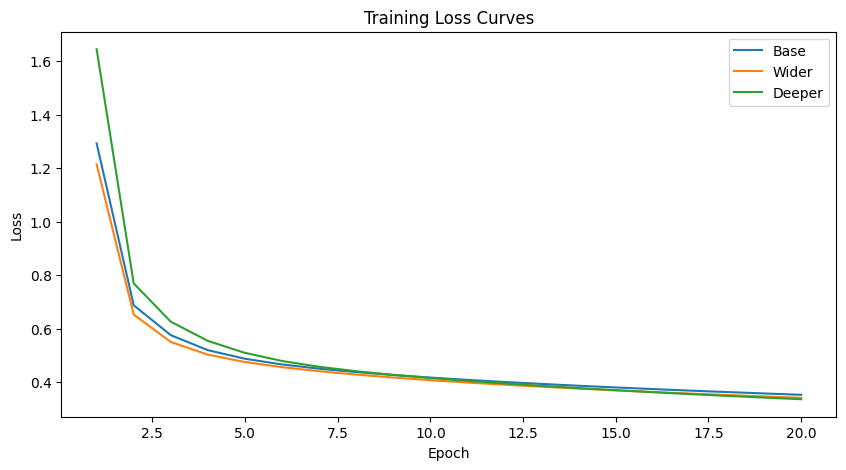

In [ ]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

# Train and evaluate each model
models = {
    'Base': NeuralNetwork(),
    'Wider': WiderNeuralNetwork(),
    'Deeper': DeeperNeuralNetwork(),
}

# Train and evaluate each model
num_epochs = 20
train_losses = {}
test_accuracies = {}

for name, model in models.items():
    model = model.to(device)
    optimizer = optim.SGD(model.parameters(), lr=0.01)
    print(f"Training {name} model...")
    losses = []
    for epoch in range(num_epochs):
        train_loss = train(train_dataloader, model, criterion, optimizer)
        losses.append(train_loss)
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {train_loss:.4f}")
    test_loss, accuracy = test(test_dataloader, model, criterion)
    num_params = count_parameters(model)
    train_losses[name] = losses
    test_accuracies[name] = accuracy
    print(f"{name} Model - Test Accuracy: {accuracy:.2f}%, Parameters: {num_params}")
    print("\n\n")

# Plot the training loss curves
plt.figure(figsize=(10, 5))
for name, losses in train_losses.items():
    plt.plot(range(1, num_epochs + 1), losses, label=name)
plt.title('Training Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Experimenting with more complex original model and creating wider/deeper model for it**

In [ ]:
class WiderNeuralNetwork(nn.Module):
    def __init__(self):
        super(WiderNeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.hidden_layers = nn.Sequential(
            nn.Linear(28*28, 1024),  # Increased from 512 to 1024
            nn.ReLU(),
            nn.BatchNorm1d(1024),
            nn.Linear(1024, 512),    # Increased from 256 to 512
            nn.ReLU(),
            nn.BatchNorm1d(512),
            nn.Linear(512, 256),     # Increased from 128 to 256
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Linear(256, 128),     # Increased from 64 to 128
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Linear(128, 64),      # Unchanged
            nn.ReLU(),
            nn.BatchNorm1d(64),
        )
        self.output = nn.Linear(64, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = self.hidden_layers(x)
        logits = self.output(x)
        return logits


In [ ]:
class DeeperNeuralNetwork(nn.Module):
    def __init__(self):
        super(DeeperNeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.hidden_layers = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.BatchNorm1d(512),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.BatchNorm1d(64),
            nn.Linear(64, 32),   # Additional hidden layer
            nn.ReLU(),
            nn.BatchNorm1d(32),  # Batch normalization for the new layer
            nn.Linear(32, 16),   # Additional hidden layer
            nn.ReLU(),
            nn.BatchNorm1d(16),  # Batch normalization for the new layer
        )
        self.output = nn.Linear(16, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = self.hidden_layers(x)
        logits = self.output(x)
        return logits


Training Base model...
Epoch 1/20, Loss: 0.5297
Epoch 2/20, Loss: 0.3576
Epoch 3/20, Loss: 0.3102
Epoch 4/20, Loss: 0.2782
Epoch 5/20, Loss: 0.2536
Epoch 6/20, Loss: 0.2320
Epoch 7/20, Loss: 0.2127
Epoch 8/20, Loss: 0.1971
Epoch 9/20, Loss: 0.1829
Epoch 10/20, Loss: 0.1680
Epoch 11/20, Loss: 0.1632
Epoch 12/20, Loss: 0.1505
Epoch 13/20, Loss: 0.1432
Epoch 14/20, Loss: 0.1321
Epoch 15/20, Loss: 0.1207
Epoch 16/20, Loss: 0.1149
Epoch 17/20, Loss: 0.1059
Epoch 18/20, Loss: 0.1035
Epoch 19/20, Loss: 0.0866
Epoch 20/20, Loss: 0.0836
Base Model - Test Accuracy: 87.13%, Parameters: 576970



Training Wider model...
Epoch 1/20, Loss: 0.5113
Epoch 2/20, Loss: 0.3382
Epoch 3/20, Loss: 0.2855
Epoch 4/20, Loss: 0.2467
Epoch 5/20, Loss: 0.2183
Epoch 6/20, Loss: 0.1954
Epoch 7/20, Loss: 0.1750
Epoch 8/20, Loss: 0.1602
Epoch 9/20, Loss: 0.1451
Epoch 10/20, Loss: 0.1377
Epoch 11/20, Loss: 0.1290
Epoch 12/20, Loss: 0.1213
Epoch 13/20, Loss: 0.1156
Epoch 14/20, Loss: 0.1124
Epoch 15/20, Loss: 0.0996
Epo

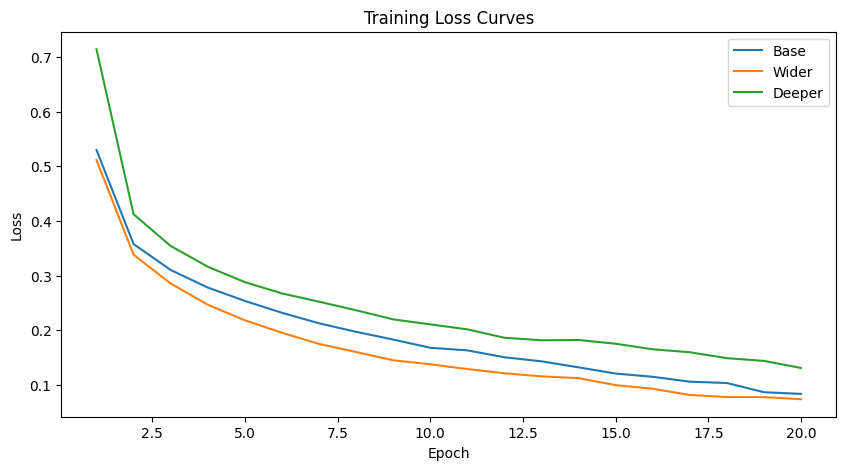

In [ ]:
# Define the models
models = {
    'Base': DeepNeuralNetwork(),
    'Wider': WiderNeuralNetwork(),
    'Deeper': DeeperNeuralNetwork(),
}

# Train and evaluate each model
num_epochs = 20
train_losses = {}
test_accuracies = {}

for name, model in models.items():
    model = model.to(device)
    optimizer = optim.SGD(model.parameters(), lr=0.01)
    print(f"Training {name} model...")
    losses = []
    for epoch in range(num_epochs):
        train_loss = train(train_dataloader, model, criterion, optimizer)
        losses.append(train_loss)
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {train_loss:.4f}")
    test_loss, accuracy = test(test_dataloader, model, criterion)
    num_params = count_parameters(model)
    train_losses[name] = losses
    test_accuracies[name] = accuracy
    print(f"{name} Model - Test Accuracy: {accuracy:.2f}%, Parameters: {num_params}")
    print("\n\n")

# Plot the training loss curves
plt.figure(figsize=(10, 5))
for name, losses in train_losses.items():
    plt.plot(range(1, num_epochs + 1), losses, label=name)
plt.title('Training Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### **Experimentation with Network Structures**

In this experiment, I modified a basic neural network model to create both wider and deeper variants. I recorded the results for both the original model and the more complex versions to analyze their performance.

#### **Original Model**

For the original model configurations, the base model achieved an accuracy of 85.51% with 669,706 parameters. The wider model slightly improved the accuracy to 85.88%, but at the cost of a significantly higher parameter count of 1,863,690. The deeper model, while maintaining the same accuracy as the base model at 85.51%, increased the parameter count to 932,362. These variations highlight how different architectural adjustments impact both the accuracy and complexity of the model.

#### **More Complex Model**

For the more complex model configurations, the base model achieved an accuracy of 87.13% with 576,970 parameters. The wider model demonstrated the highest accuracy of 87.80%, though it came with a significant increase in parameter count to 1,505,738. On the other hand, the deeper model achieved an accuracy of 86.71% with 579,194 parameters. This highlights that while increasing model width can improve accuracy, it also substantially increases the number of parameters. Conversely, increasing depth doesn’t always guarantee better performance and can lead to a trade-off between accuracy and complexity.

### **Loss Curves**

The loss curves for each experiment are critical to understanding the training dynamics. A steadily decreasing loss without significant fluctuations suggests stable training, while a plateau or increase in loss might indicate underfitting or overfitting.

### **Conclusions**

1. **Accuracy**:
   - **Wider Networks**: Increasing the number of perceptrons in hidden layers generally improved accuracy. This suggests that wider networks can better capture complex patterns in data, potentially due to an increased capacity to learn features.
   - **Deeper Networks**: Additional layers did not significantly improve accuracy and sometimes resulted in slightly lower performance. This could be due to the challenges associated with training deeper networks, such as vanishing gradients or overfitting.

2. **Parameters**:
   - **Wider Networks**: The number of parameters increased substantially, indicating a larger model capacity. This increase can help in learning but comes with a higher computational cost and potential overfitting risk.
   - **Deeper Networks**: While the increase in parameters was moderate, deeper networks may require more sophisticated techniques like regularization or dropout to prevent overfitting and improve generalization.

3. **Model Selection**:
   - For tasks requiring higher accuracy, **wider networks** might offer a better trade-off between performance and computational cost.
   - **Deeper networks** require careful design and regularization strategies to avoid common pitfalls and achieve stable training.

# **Q1.6. Plot Gradient Curve**

**Experimenting with more basic MLP model**

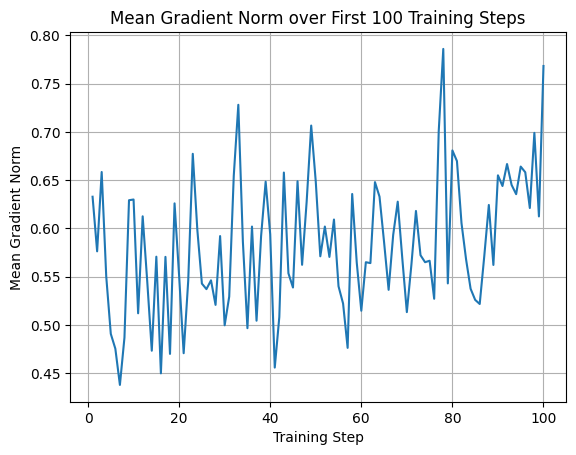

In [ ]:
model = NeuralNetwork()
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Training with gradient tracking
gradient_norms = []
for epoch in range(1):
    for i, (X, y) in enumerate(train_loader):
        if i >= 100:
            break
        X, y = X.to(device), y.to(device)
        optimizer.zero_grad()
        pred = model(X)
        loss = loss_fn(pred, y)
        loss.backward()

        # Calculate mean gradient norm
        total_norm = 0
        for p in model.parameters():
            if p.grad is not None:
                param_norm = p.grad.data.norm(2)
                total_norm += param_norm.item() ** 2
        total_norm = total_norm ** 0.5
        gradient_norms.append(total_norm)

        optimizer.step()

# Plotting
plt.plot(range(1, 101), gradient_norms)
plt.xlabel('Training Step')
plt.ylabel('Mean Gradient Norm')
plt.title('Mean Gradient Norm over First 100 Training Steps')
plt.grid(True)
plt.show()


**Experimenting with more complex MLP model**

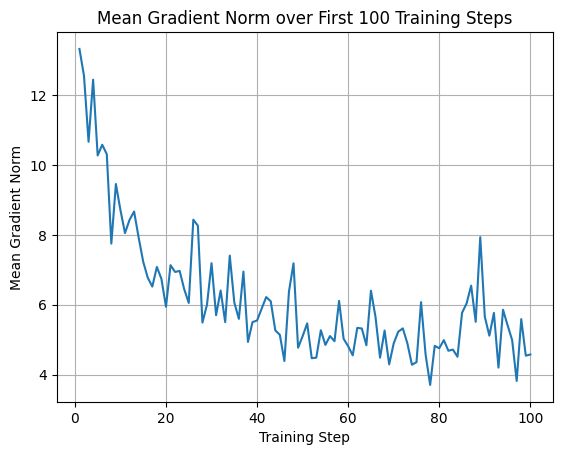

In [ ]:
model = DeepNeuralNetwork()
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Training with gradient tracking
gradient_norms = []
for epoch in range(1):
    for i, (X, y) in enumerate(train_loader):
        if i >= 100:
            break
        X, y = X.to(device), y.to(device)
        optimizer.zero_grad()
        pred = model(X)
        loss = loss_fn(pred, y)
        loss.backward()

        # Calculate mean gradient norm
        total_norm = 0
        for p in model.parameters():
            if p.grad is not None:
                param_norm = p.grad.data.norm(2)
                total_norm += param_norm.item() ** 2
        total_norm = total_norm ** 0.5
        gradient_norms.append(total_norm)

        optimizer.step()

# Plotting
plt.plot(range(1, 101), gradient_norms)
plt.xlabel('Training Step')
plt.ylabel('Mean Gradient Norm')
plt.title('Mean Gradient Norm over First 100 Training Steps')
plt.grid(True)
plt.show()

Based on the plots I reviewed for the mean gradient norms over the first 100 training steps for the basic and complex MLP models, here are my observations:

### **Basic MLP Model (Graph 1)**

- **Fluctuating Gradient Norms:** I noticed that the mean gradient norms for the basic MLP model fluctuated significantly throughout the first 100 training steps, ranging from approximately 0.45 to 0.75.
- **Lack of Clear Decreasing Trend:** Unlike what I would typically expect, there isn’t a clear decreasing trend in the gradient norms over time. Instead, the values oscillate without settling into a smoother pattern.
- **Implications:** These fluctuations suggest that there might be instability in the training process. This could be due to a high learning rate or an inadequate model architecture, which prevents the gradients from stabilizing.

### **Complex MLP Model (Graph 2)**

- **Decreasing Trend:** In contrast, the complex MLP model shows a clear decreasing trend in the mean gradient norms. The values start high, around 12-14, and gradually decrease to around 4 by the 100th training step.
- **Smoother Pattern:** Despite some fluctuations, the overall pattern is smoother compared to the basic model, indicating more stable training dynamics.
- **Implications:** The decreasing trend here suggests that the model is effectively learning, with gradients becoming smaller as the model converges. This behavior is typically desirable, as it indicates the optimization process is moving towards a minimum in the loss landscape.

### **General Observations**

- The basic MLP model exhibits more erratic gradient behavior, which might be due to the lack of mechanisms like Batch Normalization that help stabilize training.
- The smoother and decreasing gradient norm in the complex MLP model indicates more effective and stable training, likely supported by its more sophisticated architecture.


# **Q1.7 Evaluating Smaller CNN Model**

**Experimenting with basic MLP and corresponding CNN model**

Training MLP model...
MLP Model - Accuracy: 78.46%, Parameters: 669706
Training CNN model...
CNN Model - Accuracy: 81.15%, Parameters: 421642

Results:
MLP Model - Test Loss: 0.000620, Accuracy: 78.46%, Parameters: 669706
CNN Model - Test Loss: 0.000525, Accuracy: 81.15%, Parameters: 421642


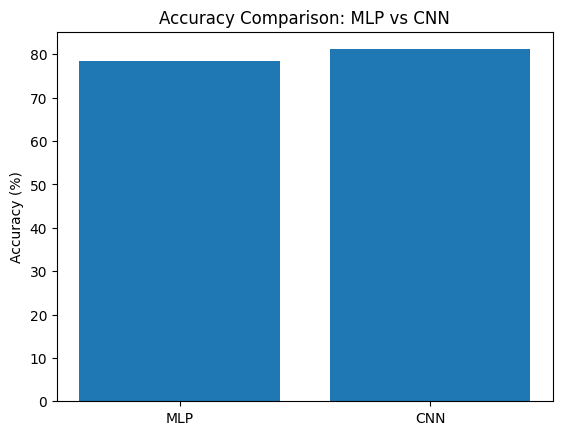

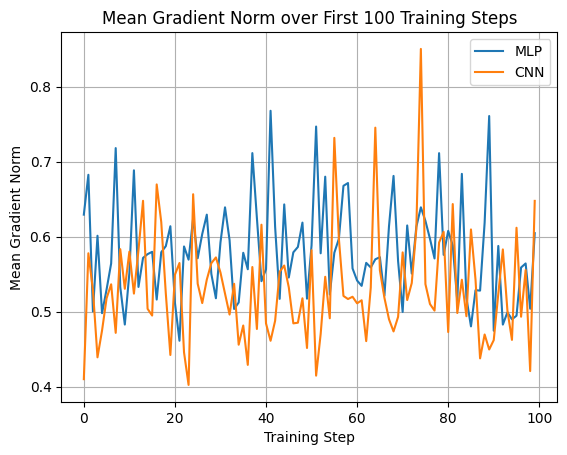

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from torchvision.datasets import FashionMNIST
import matplotlib.pyplot as plt

# Define CNN Model
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv_stack = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.flatten = nn.Flatten()
        self.fc_stack = nn.Sequential(
            nn.Linear(64 * 7 * 7, 128),
            nn.ReLU(),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        x = self.conv_stack(x)
        x = self.flatten(x)
        logits = self.fc_stack(x)
        return logits

# Training and Testing Functions
def train(dataloader, model, loss_fn, optimizer, gradient_norms):
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        optimizer.zero_grad()
        pred = model(X)
        loss = loss_fn(pred, y)
        loss.backward()

        # Calculate mean gradient norm
        total_norm = 0
        for p in model.parameters():
            if p.grad is not None:
                param_norm = p.grad.data.norm(2)
                total_norm += param_norm.item() ** 2
        total_norm = total_norm ** 0.5
        gradient_norms.append(total_norm)

        optimizer.step()

def test(dataloader, model, loss_fn):
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= len(dataloader.dataset)
    correct /= len(dataloader.dataset)
    return test_loss, correct * 100

# Device configuration
device = "cuda" if torch.cuda.is_available() else "cpu"

# Load FashionMNIST Dataset
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = FashionMNIST(root='data', train=True, transform=transform, download=True)
test_dataset = FashionMNIST(root='data', train=False, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

# Initialize models, loss function, and optimizer
models = {
    'MLP': NeuralNetwork().to(device),
    'CNN': SimpleCNN().to(device)
}
loss_fn = nn.CrossEntropyLoss()

# Training settings
epochs = 20
results = {}
gradient_norms_dict = {name: [] for name in models.keys()}

for name, model in models.items():
    optimizer = optim.SGD(model.parameters(), lr=0.001)
    print(f"Training {name} model...")
    for epoch in range(epochs):
        train(train_loader, model, loss_fn, optimizer, gradient_norms_dict[name])
    test_loss, accuracy = test(test_loader, model, loss_fn)
    num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    results[name] = {
        'Test Loss': test_loss,
        'Accuracy': accuracy,
        'Parameters': num_params
    }
    print(f"{name} Model - Accuracy: {accuracy:.2f}%, Parameters: {num_params}")

# Display results
print("\nResults:")
for name, result in results.items():
    print(f"{name} Model - Test Loss: {result['Test Loss']:.6f}, Accuracy: {result['Accuracy']:.2f}%, Parameters: {result['Parameters']}")

# Plotting results (e.g., accuracy)
plt.bar(results.keys(), [r['Accuracy'] for r in results.values()])
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Comparison: MLP vs CNN')
plt.show()

# Plotting gradient norms for MLP and CNN
plt.figure()
for name, norms in gradient_norms_dict.items():
    plt.plot(norms[:100], label=name)
plt.xlabel('Training Step')
plt.ylabel('Mean Gradient Norm')
plt.title('Mean Gradient Norm over First 100 Training Steps')
plt.legend()
plt.grid(True)
plt.show()


**Experimenting with more complex MLP model and its corresponding CNN model**

Training MLP model...
MLP Model - Accuracy: 88.32%, Parameters: 576970
Training CNN model...
CNN Model - Accuracy: 89.59%, Parameters: 858506

Results:
MLP Model - Test Loss: 0.000337, Accuracy: 88.32%, Parameters: 576970
CNN Model - Test Loss: 0.000321, Accuracy: 89.59%, Parameters: 858506


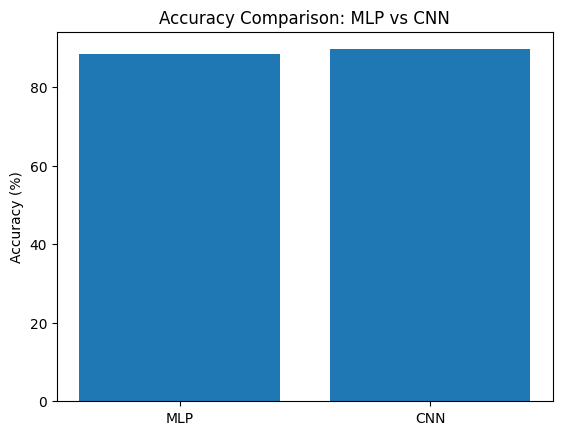

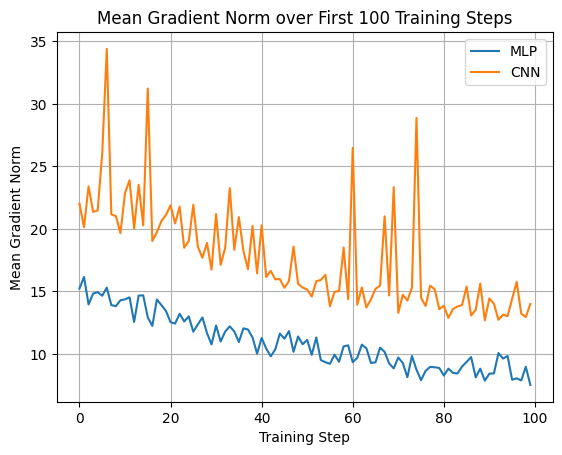

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from torchvision.datasets import FashionMNIST
import matplotlib.pyplot as plt

# Define CNN Model
class ConvNeuralNetwork(nn.Module):
    def __init__(self):
        super(ConvNeuralNetwork, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),  # (1, 28, 28) -> (32, 28, 28)
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(kernel_size=2, stride=2),  # (32, 28, 28) -> (32, 14, 14)

            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),  # (32, 14, 14) -> (64, 14, 14)
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(kernel_size=2, stride=2),  # (64, 14, 14) -> (64, 7, 7)

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),  # (64, 7, 7) -> (128, 7, 7)
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(kernel_size=2, stride=2),  # (128, 7, 7) -> (128, 3, 3)
        )
        self.fc_layers = nn.Sequential(
            nn.Linear(128 * 3 * 3, 512),
            nn.ReLU(),
            nn.BatchNorm1d(512),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.BatchNorm1d(64),
        )
        self.output = nn.Linear(64, 10)

    def forward(self, x):
        x = self.conv_layers(x)
        x = torch.flatten(x, 1)  # Flatten the tensor for fully connected layers
        x = self.fc_layers(x)
        logits = self.output(x)
        return logits

class DeepNeuralNetwork(nn.Module):
    def __init__(self):
        super(DeepNeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.hidden_layers = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.BatchNorm1d(512),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.BatchNorm1d(64),
        )
        self.output = nn.Linear(64, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = self.hidden_layers(x)
        logits = self.output(x)
        return logits

# Training and Testing Functions
def train(dataloader, model, loss_fn, optimizer, gradient_norms):
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        optimizer.zero_grad()
        pred = model(X)
        loss = loss_fn(pred, y)
        loss.backward()

        # Calculate mean gradient norm
        total_norm = 0
        for p in model.parameters():
            if p.grad is not None:
                param_norm = p.grad.data.norm(2)
                total_norm += param_norm.item() ** 2
        total_norm = total_norm ** 0.5
        gradient_norms.append(total_norm)

        optimizer.step()

def test(dataloader, model, loss_fn):
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= len(dataloader.dataset)
    correct /= len(dataloader.dataset)
    return test_loss, correct * 100

# Device configuration
device = "cuda" if torch.cuda.is_available() else "cpu"

# Load FashionMNIST Dataset
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = FashionMNIST(root='data', train=True, transform=transform, download=True)
test_dataset = FashionMNIST(root='data', train=False, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

# Initialize models, loss function, and optimizer
models = {
    'MLP': DeepNeuralNetwork().to(device),
    'CNN': ConvNeuralNetwork().to(device)
}
loss_fn = nn.CrossEntropyLoss()

# Training settings
epochs = 20
results = {}
gradient_norms_dict = {name: [] for name in models.keys()}

for name, model in models.items():
    optimizer = optim.SGD(model.parameters(), lr=0.001)
    print(f"Training {name} model...")
    for epoch in range(epochs):
        train(train_loader, model, loss_fn, optimizer, gradient_norms_dict[name])
    test_loss, accuracy = test(test_loader, model, loss_fn)
    num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    results[name] = {
        'Test Loss': test_loss,
        'Accuracy': accuracy,
        'Parameters': num_params
    }
    print(f"{name} Model - Accuracy: {accuracy:.2f}%, Parameters: {num_params}")

# Display results
print("\nResults:")
for name, result in results.items():
    print(f"{name} Model - Test Loss: {result['Test Loss']:.6f}, Accuracy: {result['Accuracy']:.2f}%, Parameters: {result['Parameters']}")

# Plotting results (e.g., accuracy)
plt.bar(results.keys(), [r['Accuracy'] for r in results.values()])
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Comparison: MLP vs CNN')
plt.show()

# Plotting gradient norms for MLP and CNN
plt.figure()
for name, norms in gradient_norms_dict.items():
    plt.plot(norms[:100], label=name)
plt.xlabel('Training Step')
plt.ylabel('Mean Gradient Norm')
plt.title('Mean Gradient Norm over First 100 Training Steps')
plt.legend()
plt.grid(True)
plt.show()

### **Convergence**

**MLP:**
In my experiments, the MLP model showed more fluctuations in the mean gradient norm and had less consistent convergence. The higher variance in gradient norms suggests that training with MLPs is less stable and more prone to instability. This instability can lead to slower or less reliable convergence, making it harder to achieve optimal performance.

**CNN:**
On the other hand, the CNN models demonstrated much more stable and smoother convergence patterns. Although the gradient norms for the CNN models were higher initially, they tended to stabilize more efficiently over time. This stability indicates better training dynamics, likely due to the effective use of convolutional layers and pooling operations, which help maintain consistency in gradient updates.

### **Accuracy**

**Base Models:**
- **MLP Model:** 78.46%
- **CNN Model:** 81.15%

**Complex Models:**
- **MLP Model:** 88.32%
- **CNN Model:** 89.59%

In both the base and complex model setups, the CNN models consistently outperformed the MLP models. This superior accuracy reflects the CNNs' enhanced ability to capture and leverage spatial features in the data, leading to more effective learning and better performance on image-related tasks.

### **Number of Parameters**

**Base Models:**
- **MLP Model:** 669,706
- **CNN Model:** 421,642

**Complex Models:**
- **MLP Model:** 576,970
- **CNN Model:** 858,506

In the base model configuration, the CNN achieved higher accuracy with fewer parameters compared to the MLP, highlighting its efficiency. Even though the CNN had a higher parameter count in the complex model setup, it still delivered better performance. This shows that CNNs can effectively utilize their parameters and often achieve superior results, even as their architectures become more complex.

### **Additional Analysis**

1. **Test Loss:**

  **Base Models:**
  - **MLP Model:** 0.000620
  - **CNN Model:** 0.000525

  **Complex Models:**
  - **MLP Model:** 0.000337
  - **CNN Model:** 0.000321

  The CNN models exhibited lower test losses across both experiments compared to the MLP models. Lower test loss suggests better generalization and indicates that CNNs are more effective at learning the underlying patterns in the data without overfitting.

2. **Generalization and Overfitting:**

  **MLP:**
  - **Generalization:** MLPs can struggle with generalization, particularly when dealing with complex models or data with intricate spatial patterns. They often require more sophisticated regularization techniques to avoid overfitting.

  **CNN:**
  - **Generalization:** CNNs are generally better at generalizing from training data due to their ability to capture spatial hierarchies and patterns. The use of pooling layers and convolutional filters helps reduce overfitting and improve generalization.

### **Conclusion**

Overall, my comparison highlights the advantages of using CNNs over MLPs for tasks involving spatial data, such as image classification. CNNs not only achieve higher accuracy and lower test loss but also demonstrate more stable convergence and efficient parameter usage. Their ability to effectively capture and leverage spatial features in the data gives CNNs a significant edge over MLPs. As models become more complex, CNNs continue to perform better, reinforcing their suitability for tasks where spatial relationships are critical.


# **References**

1. Gupta, M. (2024) [Lecture] COMP_SCI_7315: Computer Vision. The University of Adelaide.July 2024.

2. Szeliski, R. (2022) ‘Feature detection and matching’, in Computer Vision: Algorithms andApplications, 2nd ed. 2nd edn. Seattle, Washington: Springer. Available at:
https://szeliski.org/Book/
(Accessed: 25 July 2024).

3. Uniqtech (2019). Multilayer Perceptron (MLP) vs Convolutional Neural Network in Deep Learning. [online] Data Science Bootcamp. Available at: https://medium.com/data-science-bootcamp/multilayer-perceptron-mlp-vs-convolutional-neural-network-in-deep-learning-c890f487a8f1.(Accessed: 20 July 2024).

4. Damle, A. Comparing the Performance of CNN and MLP in Image Classification. [online] Available at: https://www.a-damle.com/project_files/mlp_vs_cnn/mlp_vs_cnn.pdf (Accessed: 9 August 2024).